In this example, we will examine the satisfiability of the boolean formula $(A \vee B) \wedge \neg B$ using Grover's algorithm.

In [1]:
using SymbolicQuantumSimulator
using StatsPlots
using SymPy

In [2]:
Base.retry_load_extensions()

Grover's algorithm works by alternating between two phases: inversion and query. The query phase implements the boolean formula itself using quantum gates.

In [3]:
function inversion()
    append!(qc, HGate.(qsearch))
    append!(qc, XGate.(qsearch))

    push!(qc, CCXGate(qsearch..., qancilla[1]))

    append!(qc, XGate.(qsearch))
    append!(qc, HGate.(qsearch))
end

function query()
    push!(qc, OrGate(qsearch..., qaux[1]))
    push!(qc, NegGate(qsearch[2], qaux[2]))
    push!(qc, AndGate(qaux..., qancilla[1]))
    push!(qc, NegGate(qsearch[2], qaux[2]))
    push!(qc, OrGate(qsearch..., qaux[1]))
end;

In [4]:
qsearch = QuantumRegister(2, "q_search")
qaux = QuantumRegister(2, "q_aux")
qancilla = QuantumRegister(1, "q_ancilla");

In [5]:
qc = QuantumCircuit(qsearch..., qaux..., qancilla...)

# Initialize the search register
append!(qc, HGate.(qsearch))

# Initialize the ancilla register
push!(qc, XGate(qancilla[1]))
push!(qc, HGate(qancilla[1]))

iters = floor(π * sqrt(2 ^ length(qsearch)) / 4)

for iter in 1:iters
    push!(qc, Barrier())
    query()
    push!(qc, Barrier())
    inversion()
end

push!(qc, Barrier())

# Deinitialize the ancilla register
push!(qc, HGate(qancilla[1]))
push!(qc, XGate(qancilla[1]))

# Measure the search qubits
append!(qc, Measurement.(qsearch));

The complete circuit for finding a satisfying variable assignment is as follows:

In [6]:
draw(qc)

             ┌───┐        ┌─────┐                        ┌─────┐   ┌───┐┌───┐     ┌───┐┌───┐        »
 q_search_1: ┤ H ├──────░─┤<    ├────────────────────────┤<    ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░──────»
             ├───┤      ░ │     │┌──────┐        ┌──────┐│     │ ░ ├───┤├───┤  │  ├───┤├───┤ ░      »
 q_search_2: ┤ H ├──────░─┤< Or ├┤<     ├────────┤<     ├┤< Or ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░──────»
             └───┘      ░ │     ││      │┌──────┐│      ││     │ ░ └───┘└───┘  │  └───┘└───┘ ░      »
    q_aux_1: ───────────░─┤>    ├┤  Neg ├┤<     ├┤  Neg ├┤>    ├─░─────────────┼─────────────░──────»
                        ░ └─────┘│      ││      ││      │└─────┘ ░             │             ░      »
    q_aux_2: ───────────░────────┤>     ├┤< And ├┤>     ├────────░─────────────┼─────────────░──────»
             ┌───┐┌───┐ ░        └──────┘│      │└──────┘        ░           ┌─┴─┐           ░ ┌───┐»
q_ancilla_1: ┤ X ├┤ H ├─░────────────────┤>     ├────────────────░───────────┤ X ├

We can simulate the circuit and visualize the results:

In [7]:
results = simulate_measurements(qc)

Dict{String, Sym} with 4 entries:
  "00" => 0
  "10" => 1
  "11" => 0
  "01" => 0

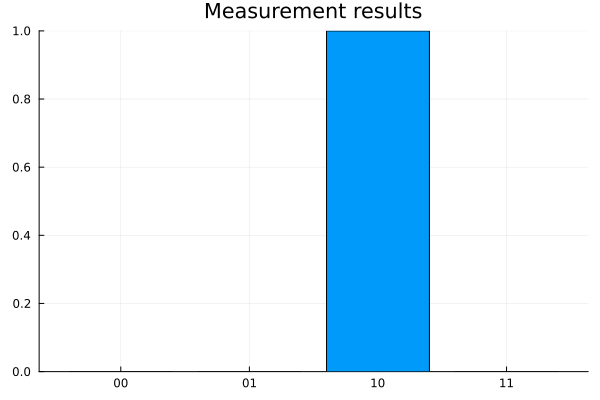

In [8]:
SymbolicQuantumSimulator.plot_measurements(results)

The most probable set of values to measure is represented by the binary string '01'. Therefore, **the only satisfying assignment for the forumla** $(A \vee B) \wedge \neg B$ **is** $A = 1, B = 0$.